In [ ]:
# December 10, 2015 – March 7, 2016 - section 48  3 months rent compensation for good faith - https://www.ontario.ca/laws/statute/06r17/v19#BK56
# https://www.ontario.ca/laws/statute/s15028  Protecting Condominium Owners Act, 2015, S.O. 2015, c. 28 - Bill 106
#Although most of the changes that were made to Bill 106 (between second and third Reading) were more of a cleanup or clarification nature, one significant change was the elimination of a condominium corporation's right under s. 134 of the Act to terminate leases and evict tenants for breach of the Act, or the corporation's declaration, by-laws and rules. It was decided that only the Landlord and Tenant Tribunal should have the jurisdiction to terminate a tenancy under the Residential Tenancies Act, 2006.
# https://ccitoronto.org/condovoice/37
# December 3, 2015, Protecting Condominium Owners Act, 2015, prohibits condo corporations from evicting tenants, only the board can do that (search "Residential Tenancies Act" here: https://www.ontario.ca/laws/statute/s15028)
# ^ possible that condo landlords needed time to get used to the system because they were not required to do it before. 

# https://www.acto.ca/ontario-government-goes-back-to-failed-rent-control-policy/ 
# If you move into an apartment, a condo unit, or a basement unit that was first occupied as a residential space after November 15, 2018, there will be no legal limit 
#            set on how much your landlord will be able to raise your rent. 
# assent: https://www.ontario.ca/laws/statute/s17013 May 30, 2017
# repealed: https://www.ola.org/en/legislative-business/bills/parliament-41/session-2/bill-124
# The Bill repeals subsection 6 (2) of the Act.  Currently, subsection 6 (2) exempts certain rental units from various rules relating to rent 
#     (including rules relating to the rent increase guideline).  There are three categories of rental units that are exempt: a unit that was not occupied for any 
#     purpose before June 17, 1998; a unit that has not been previously rented since July 29, 1975; and a unit in a building, mobile home park or land lease 
#     community no part of which was occupied for residential purposes before November 1, 1991.



In [1]:
from ast import literal_eval
from bs4 import BeautifulSoup as bs
from collections import Counter
from colour import Color
from datetime import date, timedelta, datetime
from dateutil.relativedelta import relativedelta
from gensim import parsing 
from IPython.core.display import display, HTML
from itertools import combinations, tee
from joblib import Parallel, delayed
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
from matplotlib.ticker import PercentFormatter
from nltk import ngrams
from nltk.tokenize import sent_tokenize
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from stargazer.stargazer import Stargazer
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.iolib.summary2 import summary_col
from timeit import timeit
from tqdm import tqdm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import multiprocessing, requests, re, csv, pickle, spacy, nltk, os, random, json, time, random, csv, os, datetime, lxml, glob, imutils, subprocess, pytesseract, operator, multiprocessing
import numpy as np
import pandas as pd
import researchpy as rp
import scipy.sparse as ss
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost, numpy, textblob, string
%matplotlib inline

def create_xticks(dtf):
    qrtrs = []
    qlist = sorted(list(set(dtf['quarter'].tolist())))
    for i,qr in enumerate(qlist):
        qr = str(qr)
        qtr = qr.split('Q')[1]
        year = qr.split('Q')[0]
        if qtr == '1':
            newqr = '\n\n'.join([qtr,year])
        else:
            newqr = qtr
        qrtrs.append(newqr)
    return qrtrs, len(qlist)

colorlistindices = [0,1,2,3,4]
bluegradient = [['#0b00ff','#0063ff','#0092ff','#2ab9ff','#a7daf6'][i] for i in colorlistindices]
redgradient = ["#ff0000,#ff4f41,#ff7970,#ff9f9b,#f5c2c2".split(',')[i] for i in colorlistindices]
pinkgradient = ["#ff00fe,#f556f7,#eb79ef,#e194e5,#d7abda".split(',')[i] for i in colorlistindices]
greengradient = ["#093f05,#265a21,#40763c,#5b9458,#76b276".split(',')[i] for i in colorlistindices]
yellowgradient = ["#ffe700,#e3d42f,#c9c141,#b1ad4e,#9b9a57".split(',')[i] for i in colorlistindices]
orangegradient = "#ff7101,#f37927,#e7813e,#da8752,#cc8d65,#FFD9B3".split(',')
purplegradient = ["#6001ff,#7536ff,#8753ff,#986cff,#a884fd".split(',')[i] for i in colorlistindices]
blackwhitegradient = ["#020003,#48454c,#908d9b,#dedef3".split(',')[i] for i in [0,1,2]]

bluegradient.reverse()
redgradient.reverse()
pinkgradient.reverse()
greengradient.reverse()
yellowgradient.reverse()
orangegradient.reverse()
purplegradient.reverse()

colorlist = pinkgradient+bluegradient+purplegradient+orangegradient+greengradient+redgradient+blackwhitegradient


mainpath = str(os.getcwd())+'/'
df = pd.read_csv(mainpath+"output/6_case_db.csv",sep='\t')
df['datetime'] = pd.to_datetime(df['date'])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['month_year'] = df['month'].astype(str) + '_' + df['year'].astype(str)
df['quarter'] = pd.PeriodIndex(df.datetime, freq='Q')
df['numone'] = 1
df.fillna(np.nan,inplace=True)

tdf = df[df['applicant']==1]
ldf = df[df['applicant']==0]
print(tdf.shape)
print(ldf.shape)

print(tdf['topicname'].value_counts())
print(ldf['topicname'].value_counts())
print('------------------------------------------')
traindf = pd.read_csv(mainpath+'output/4_traindataplus.csv',sep='\t')
traindf = traindf[traindf['outcome']!='nottrainingsample']
print(traindf.shape)
print(traindf['applicant'].value_counts())
print(traindf['winner'].value_counts())
pd.crosstab(traindf.winner, traindf.applicant)
print('------------------------------------------')

print(df['applicant'].value_counts())
print(df['winner'].value_counts())
pd.crosstab(df.winner, df.applicant)
print('------------------------------------------')
# df0 = pd.concat([tdf,ldf])
# print(df0.shape)

2022-01-22 18:15:51.625962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-22 18:15:51.625987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(5860, 47)
(30601, 47)
Interference                 3593
Interfere/Rent Control       1574
Rent Control                  299
Bad Faith                     296
Rent Control/Interference      88
Interference/Act Applies       10
Name: topicname, dtype: int64
Nonpayment                         15091
Interference                        4546
Good Faith/Nonpayment               3432
Failed Condition                    3362
Agreement                           1743
Compensation for Landlords          1268
Nonpayment/Agreement/Good Faith     1054
Good Faith/Agreement/Nonpayment      105
Name: topicname, dtype: int64
------------------------------------------
(1636, 29)
l    1133
t     503
Name: applicant, dtype: int64
l    968
t    668
Name: winner, dtype: int64
------------------------------------------
0    30601
1     5860
Name: applicant, dtype: int64
0    27286
1     9175
Name: winner, dtype: int64
------------------------------------------


<h2> SJTO Applications by Resolution Type VS Custom DB </h2>

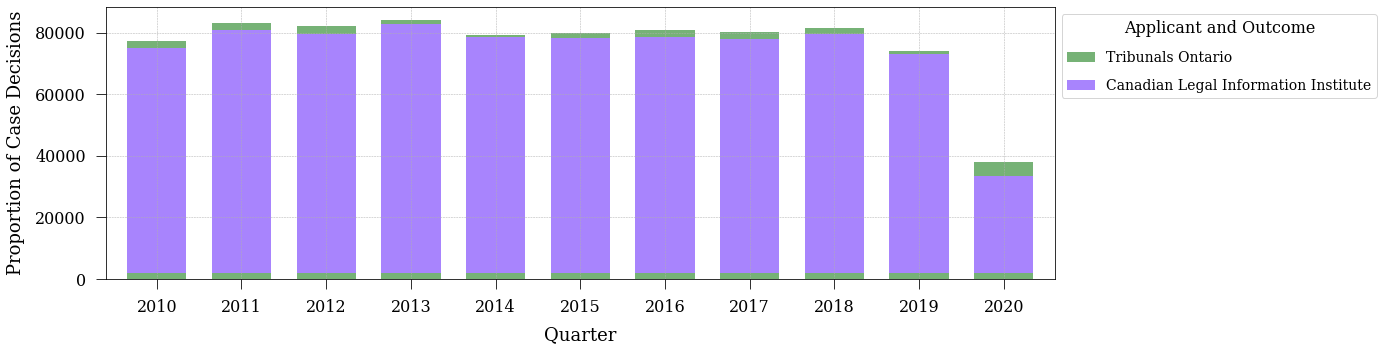

In [55]:
# yearcount = df['year'].value_counts().reset_index()
# yearcount.columns = ['year','count']
# yearcount = yearcount[(yearcount['year']>=2010)&(yearcount['year']<=2020)]
# ycdict = dict(zip(yearcount['year'],yearcount['count']))

# sjdf = pd.read_csv(mainpath +'output/sjto_data/appresolutionstats_sjto.csv',sep='\t')
# del sjdf['notes']
# sjdf = sjdf[sjdf['Resolution Type']== 'Total']
# del sjdf['Resolution Type']
# sjdf.columns = [int(x) for x in ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']]
# sjdf = sjdf.T.reset_index()
# sjdf.columns = ['year','sjtocount_resolution']

# sjdf['dcount'] = sjdf['year'].map(ycdict)
# sjdf['sjtocount_resolution'] = sjdf['sjtocount_resolution'].astype(int)
# sjdf['sjtocount_resolution'] = sjdf['sjtocount_resolution'] - sjdf['dcount']
# sjdf.sort_values(by='year',inplace=True)
# sjdf.set_index('year')

# qrtrs = ['2010', '2011', '2012', '2013', '2014', '2015','2016', '2017',  '2018',  '2019',  '2020']
# qrtrslen = len(qrtrs)

# fig, ax = plt.subplots()
# sjdf.plot(kind='bar', stacked=True,figsize=(17, 5),color=[greengradient[0],purplegradient[0]],ax=ax,width=0.7)

# ax.set_xticks(np.arange(0,qrtrslen,1))
# ax.set_xticklabels(qrtrs)
# ax.tick_params(length=10, which='both', pad=10)

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.size"] = 16
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'
# plt.legend(title="Applicant and Outcome", fontsize=14, fancybox=True,bbox_to_anchor=(1, 1),labelspacing = 1,labels=["Tribunals Ontario","Canadian Legal Information Institute"])
# plt.axvspan(42.72, 48.7, color=redgradient[3], alpha=0.4, lw=0)

# plt.xticks(rotation =0,fontsize=16,fontname='serif')
# plt.yticks(rotation =0,fontsize=16,fontname='serif')
# plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
# plt.ylabel("Proportion of Case Decisions", fontsize=18,labelpad=10,fontname='serif')
# plt.grid(linestyle = '--', linewidth = 0.5)

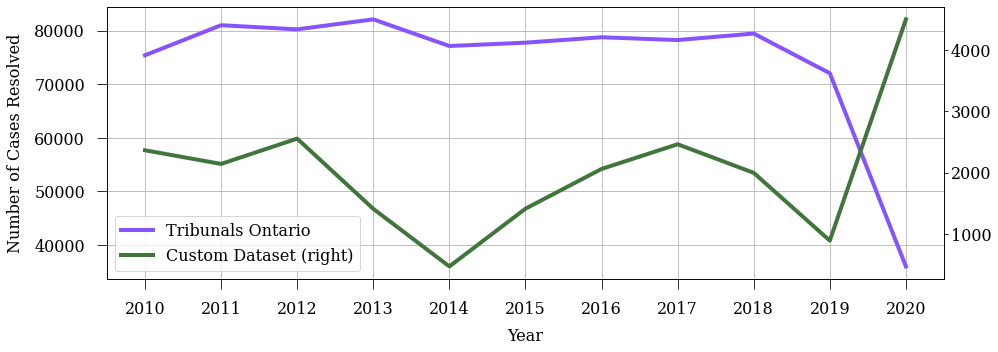

In [4]:
yearcount = df['year'].value_counts().reset_index()
yearcount.columns = ['year','count']
yearcount = yearcount[(yearcount['year']>=2010)&(yearcount['year']<=2020)]
ycdict = dict(zip(yearcount['year'],yearcount['count']))

sjdf = pd.read_csv(mainpath +'output/sjto_data/appresolutionstats_sjto.csv',sep='\t')
del sjdf['notes']
sjdf = sjdf[sjdf['Resolution Type']== 'Total']
del sjdf['Resolution Type']
sjdf.columns = [int(x) for x in ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010']]
sjdf = sjdf.T.reset_index()
sjdf.columns = ['year','sjtocount_resolution']

sjdf['dcount'] = sjdf['year'].map(ycdict)
sjdf['sjtocount_resolution'] = sjdf['sjtocount_resolution'].astype(int)
# sjdf.set_index('year')

fig, axs = plt.subplots(figsize=(15,5))
axs.tick_params(axis='both', which='major', pad=12,length=10)

# ASSIGN AXES OBJECTS ACCORDINGLY
sjdf.plot(ax=axs, x='year', y='sjtocount_resolution', grid=True, label="Tribunals Ontario", linewidth=4,xlabel='Year',ylabel = "Number of Cases Resolved",color=purplegradient[2])
sjdf.plot(ax=axs, x='year', y='dcount', secondary_y=True, label="Custom Dataset", linewidth=4,xlabel='Year', grid=True,xticks = sorted(sjdf['year'].tolist()),color=greengradient[2])
plt.rcParams['legend.loc'] = "best"
# plt.rcParams['legend.handlelength'] = 2
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlesize'] = 16
# plt.savefig(mainpath + 'graphs/sjtovscustomdb.png', dpi=600, bbox_inches='tight')
plt.show()

<h2> Cases by Office Location </h2>

In [5]:
alllocs = sorted(list(set(df['newloc'].tolist())))
newlocframes = []
for n,g in df.groupby(['year']):
    g2 = g['newloc'].value_counts().reset_index().T
    g2.columns = g2.iloc[0]
    g2 = g2.iloc[1:]
    g2cols = list(g2.columns)
    missingcols = list(set(alllocs)-set(g2cols))
    for m in missingcols:
        g2[m] = 0
    g2['year'] = n
    newlocframes.append(g2)
nlocdf = pd.concat(newlocframes)
nlocdf = nlocdf[['year','Southern_Hamilton', 'SouthWest_London','Central_Mississauga', 'Eastern_Ottawa', 'Northern_Sudbury', 'TOEast', 'HeadOffice_Toronto', 'TONorth', 'TOSouth','missing']]
# del nlocdf['index']
# nlocdf

<h2> Custom Applicant Win/loss Rates </h2>

In [6]:
qframes = []
for n,g in df.groupby(['quarter']):
    winlossdict = {}
    winlossdict['quarter'] = str(n)
    winlossdict['Landlord Wins'] = 0.0
    winlossdict['Landlord Losses'] =0.0
    winlossdict['Tenant Wins'] = 0.0
    winlossdict['Tenant Losses'] =0.0
    winlossdict['llcasecount'] =0.0
    winlossdict['ttcasecount'] =0.0
    qcasecount = sum(g['numone'].tolist())
    winlossdict['qcasecount'] = qcasecount
    for l,h in g.groupby(['applicant','winner']):
        if l[0]==1:
            winlossdict['llcasecount']=sum(g['numone'].tolist())
        else:
            winlossdict['ttcasecount']=sum(g['numone'].tolist())
        if l[0] == 0 and l[1] == 0:
            winlossdict['Landlord Wins'] = round(sum(h['numone'].tolist())/qcasecount,3)
        elif l[0] == 0 and l[1] == 1:
            winlossdict['Landlord Losses'] = round(sum(h['numone'].tolist())/qcasecount,3)
        elif l[0] == 1 and l[1] == 1:
            winlossdict['Tenant Wins'] = round(sum(h['numone'].tolist())/qcasecount,3)
        else:
            winlossdict['Tenant Losses'] = round(sum(h['numone'].tolist())/qcasecount,3)
            continue
    wldf = pd.DataFrame(list(winlossdict.values())).T.reset_index()
    del wldf['index']
    wldf.columns = ['quarter','llwins','llloss','ttwins','ttloss','casecount','llcasecount','ttcasecount']
    qframes.append(wldf)
ydf = pd.concat(qframes)
print(ydf.shape)

(61, 8)


<h2> Custom Cumulative Distribution of Applicants by Ruling </h2>

In [7]:
# print(qrtrs)
# qrtrs = ['', '\'07', '', '', '', '\'08', '', '', '','\'09', '', '', '', '\'10', '', '', '', '\'11', '', '', '', '\'12', '', '', '', '\'13', '', '', '', '\'14', '', '', '', '\'15', '', '', '','\'16', '', '', '', '\'17', '', '', '', '\'18', '', '', '', '\'19', '', '', '', '\'20', '', '', '', '\'21', '', '', '']
qrtrs = ['', '2007', '', '', '', '2008', '', '', '','2009', '', '', '', '2010', '', '', '', '2011', '', '', '', '2012', '', '', '', '2013', '', '', '', '2014', '', '', '', '2015', '', '', '','2016', '', '', '', '2017', '', '', '', '2018', '', '', '', '2019', '', '', '', '2020', '', '', '', '2021', '', '', '']
qrtrslen = len(qrtrs)

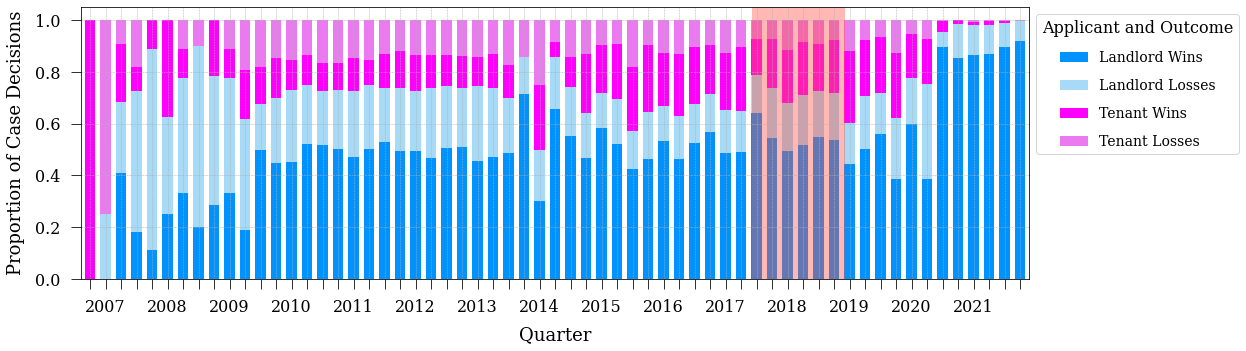

In [10]:
# qrtrs, qrtrslen = create_xticks(ydf)
fig, ax = plt.subplots()
ydf[['quarter','llwins','llloss','ttwins','ttloss']].plot(kind='bar', stacked=True,figsize=(17, 5),color=[bluegradient[2],bluegradient[0],pinkgradient[4],pinkgradient[2]],ax=ax,width=0.7)

ax.set_xticks(np.arange(0,qrtrslen,1))
ax.set_xticklabels(qrtrs)
ax.tick_params(length=10, which='both', pad=10)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.legend(title="Applicant and Outcome", fontsize=14, fancybox=True,bbox_to_anchor=(1, 1),labelspacing = 1,labels=['Landlord Wins','Landlord Losses','Tenant Wins','Tenant Losses'])
plt.axvspan(42.72, 48.7, color=redgradient[3], alpha=0.4, lw=0)

plt.xticks(rotation =0,fontsize=16,fontname='serif')
plt.yticks(rotation =0,fontsize=16,fontname='serif')
plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Proportion of Case Decisions", fontsize=18,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.savefig(mainpath + 'graphs/svmmodel_dist.png', dpi=600, bbox_inches='tight')

<h2> Custom Proportion of Applications Won by Landlords and Tenants Across Topics </h2>

In [11]:
newtdict = {'Rent Control/Interference': 'Rent Control',
 'Agreement': 'Agreement',
 'Good Faith/Agreement/Nonpayment': 'Good Faith',
 'Bad Faith': 'Bad Faith',
 'Interference/Act Applies': 'Interference',
 'Interference': 'Interference',
 'Rent Control': 'Rent Control',
 'Nonpayment/Agreement/Good Faith': 'Nonpayment',
 'Good Faith/Nonpayment': 'Good Faith',
 'Interfere/Rent Control': 'Interference',
 'Failed Condition': 'Failed Condition',
 'Compensation for Landlords': 'Nonpayment',
 'Nonpayment': 'Nonpayment'}
df['topicname'] = df['topicname'].map(newtdict)
print(df['topicname'].value_counts())

Nonpayment          17413
Interference         9723
Good Faith           3537
Failed Condition     3362
Agreement            1743
Rent Control          387
Bad Faith             296
Name: topicname, dtype: int64


In [12]:
topicolors = {'Agreement':[bluegradient[3],bluegradient[0]],
 'Bad Faith':[purplegradient[3],purplegradient[0]],
 'Rent Control':[pinkgradient[3],pinkgradient[0]],
 'Nonpayment':[yellowgradient[3],yellowgradient[0]],
 'Interference':[greengradient[3],greengradient[0]],
 'Good Faith':[blackwhitegradient[0],blackwhitegradient[2]],
 'Failed Condition':[orangegradient[5],orangegradient[0]]}

In [13]:
wintopicframes = []
for n,g in df.groupby(['quarter','topicname']):
    quartercount = g.shape[0]
    llwins = g[g['winner']==0].shape[0]/quartercount
    ttwins = g[g['winner']==1].shape[0]/quartercount
    wintopicframes.append([n[0],n[1],quartercount,llwins,ttwins,g[g['winner']==0].shape[0],g[g['winner']==1].shape[0]])
wtdf = pd.DataFrame(wintopicframes,columns = ['quarter','topicname','quartercount','llwinrate','ttwinrate','llwins','ttwins'])
wtdf.sort_values(by=['quarter','topicname'],inplace=True)

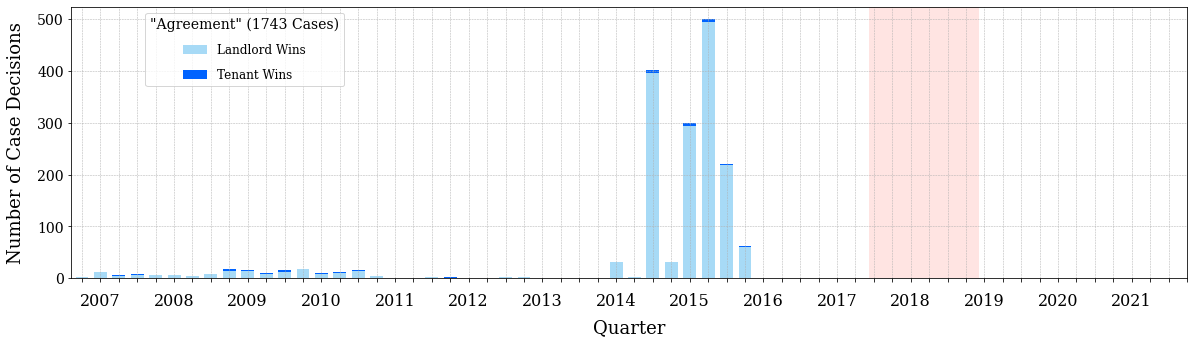

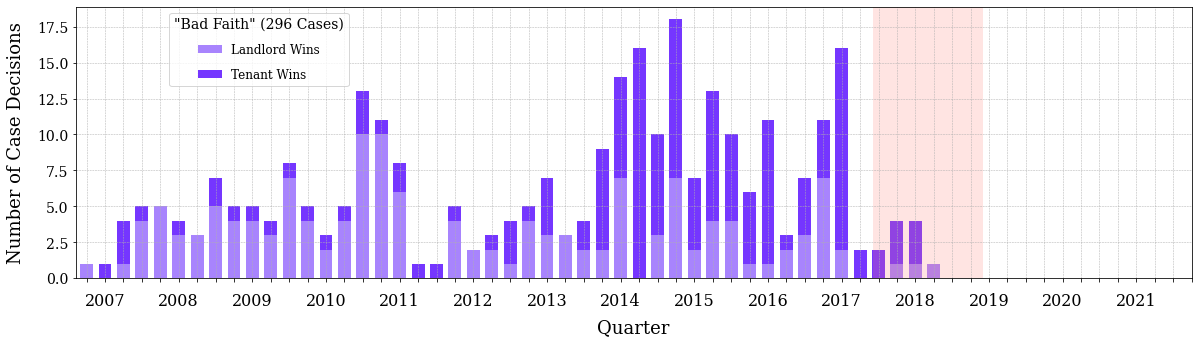

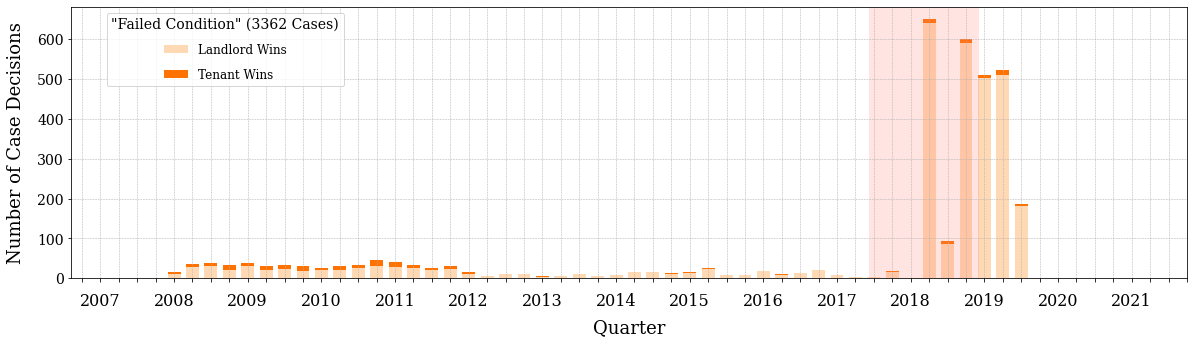

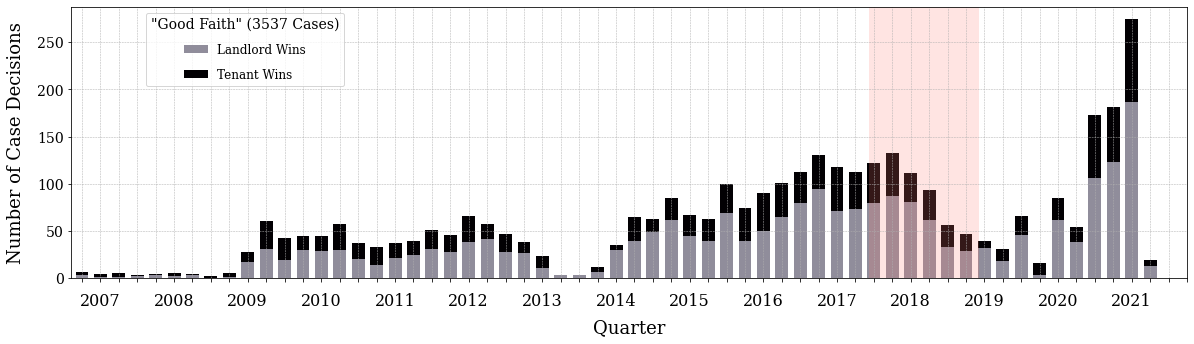

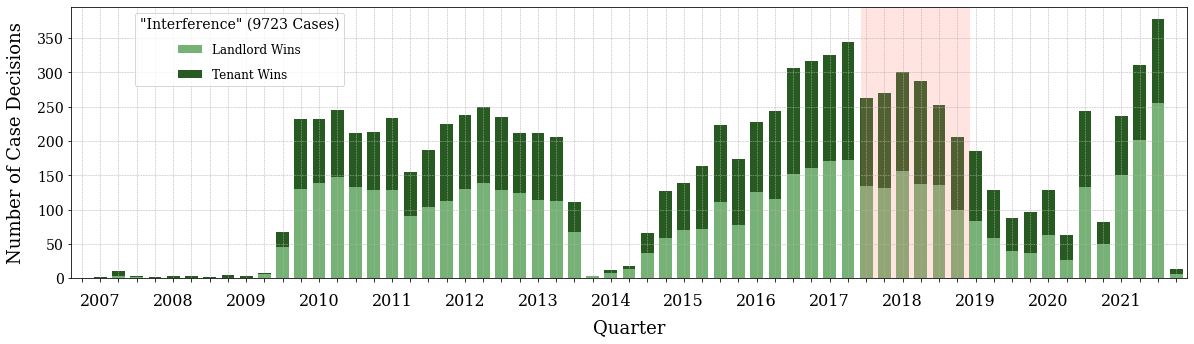

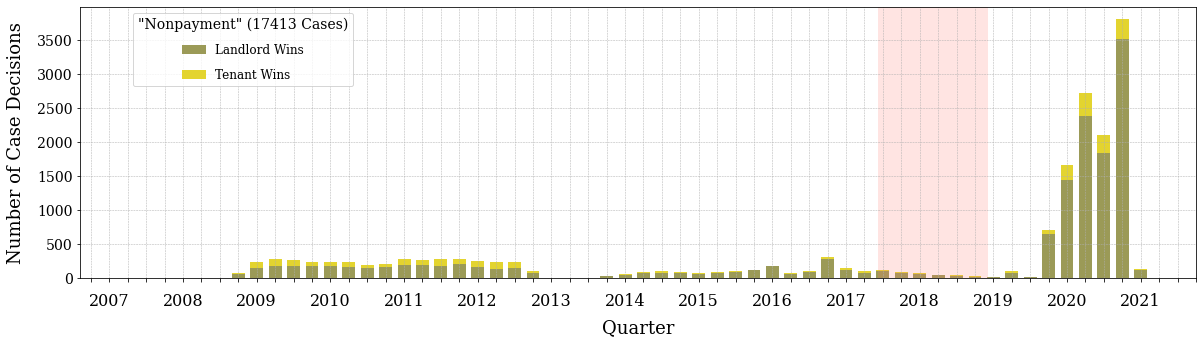

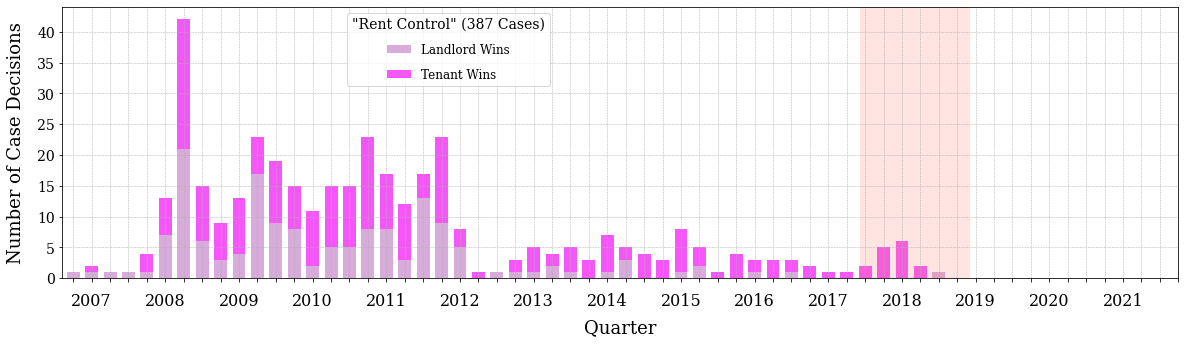

In [35]:
for n,g in wtdf.groupby('topicname'):
    # if 'Faith' in n or 'Rent' in n:
    # qrtrs, qrtrslen = create_xticks(wtdf)
    fig, ax = plt.subplots(sharex=True)
    # # g[['quarter','llwinrate','ttwinrate']].plot(kind='line',figsize=(30, 5),color=[topicolors[n][0],topicolors[n][1]],ax=ax,secondary_y=True)
    g[['quarter','llwins','ttwins']].plot(kind='bar', stacked=True,figsize=(20, 5),color=[topicolors[n][1],topicolors[n][0]],ax=ax,width=0.7)
    ax.set_xticks(np.arange(0,qrtrslen,1))
    ax.set_xticklabels(qrtrs)
    # ax.set_title(n+": "+str(g['quartercount'].sum()), pad=20)
    # ax2.set_xticklabels(qrtrs)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.size"] = 14
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    plt.legend(title='"'+n+'"'+" ("+str(g['quartercount'].sum())+" Cases)", fontsize=12, fancybox=True,bbox_to_anchor=(0.25,1),labelspacing = 1,labels=['Landlord Wins','Tenant Wins'])
    plt.axvspan(42.72, 48.7, color=redgradient[2], alpha=0.2, lw=0)

    plt.xticks(rotation =0,fontsize=16,fontname='serif')
    plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
    plt.ylabel("Number of Case Decisions", fontsize=18,labelpad=12,fontname='serif')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.tick_params(axis='x', which='major', pad=10)
    plt.savefig(mainpath + 'graphs/topics/svmmodel_dist_'+n+'.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
ydf[['quarter','llwins','llloss','ttwins','ttloss']].drop_duplicates().plot(kind='bar', stacked=True,figsize=(20, 5),color=[bluegradient[2],bluegradient[0],pinkgradient[4],pinkgradient[2]],ax=ax,width=0.7)

ax.set_xticks(np.arange(0,qrtrslen,1))
ax.set_xticklabels(qrtrs)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.legend(title="Applicant and Outcome", fontsize=12, fancybox=True,bbox_to_anchor=(1, 1),labelspacing = 1,labels=['Landlord Wins','Landlord Losses','Tenant Wins','Tenant Losses'])
plt.axvspan(42.72, 48.7, color=redgradient[3], alpha=0.4, lw=0)

plt.xticks(rotation =0,fontsize=16,fontname='serif')
plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Proportion of Case Decisions", fontsize=18,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tick_params(axis='x', which='major', pad=10)
# plt.savefig(mainpath + 'graphs/svmmodel_dist.png', dpi=600, bbox_inches='tight')

In [ ]:
appqtrtopicframes = []
for z,subdf in df.groupby('applicant'):
    for n,g in subdf.groupby('quarter'):
        quartercount = g.shape[0]
        for j,k in g.groupby('topicname'):
            appcount = k.shape[0]
            wincount = k[k['winner']==z].shape[0]
            winrate = wincount/appcount
            topicquarter = appcount/quartercount
            topicwinquarter = wincount/quartercount
            topiclossquarter = 1-topicwinquarter
            appqtrtopicframes.append([z,quartercount,n,j,winrate,topicquarter,wincount,topicwinquarter,topiclossquarter])    
winratedf = pd.DataFrame(appqtrtopicframes,columns = ['applicant','quartercount','quarter','topic','winrate','topicqtrrate','wincount','topicwinrate','topiclossrate'])
# winratedf = winratedf[winratedf['topic'].str.contains(r'|'.join([x.split(' (',1)[0].strip() for x in besttenanttopics+bestlandlordtopics]))]
# winratedf = winratedf[(winratedf['topic'].str.contains("N12|T5"))]

<h3> Landlord Win Rate </h3>

In [ ]:
# winratedfll = winratedf[(winratedf['applicant']==0)&(~winratedf['topic'].isin(['other','Nonpayment']))]
# winratedfll = winratedf[(winratedf['applicant']==0)&(~winratedf['topic'].isin(['other','Nonpayment','Settlement','Interfere']))]
# winratedfll = winratedf[(winratedf['applicant']==0)&(winratedf['topic'].str.contains("Faith"))]
winratedfll = winratedf[(winratedf['applicant']==0)&(~winratedf['quarter'].astype(str).str.contains("200|2020|2021"))]
winratedfll.sort_values(by=['quarter','quartercount'],inplace=True)
winratedfllpivot = winratedfll.pivot(index='quarter', columns='topic', values='quartercount').fillna(0)
qrtrs = []
for i,qr in enumerate(sorted(list(set(winratedfll['quarter'].tolist())))):
    qr = str(qr)
    qtr = qr.split('Q')[1]
    year = qr.split('Q')[0]
    if qtr == '1':
        newqr = '\n\n'.join([qtr,year])
    else:
        newqr = qtr
    qrtrs.append(newqr)

fig, ax = plt.subplots()
ax.set_xticks(np.arange(0,len(list(set(winratedfll['quarter'].tolist()))),1))
# ax.set_xticklabels(qrtrs)
plt.axvspan(40.7, 46.7, color=redgradient[-1], alpha=0.2, lw=0)
# winratedfllpivot.plot(kind='bar', stacked=True,figsize=(20, 10),color=[purplegradient[2],bluegradient[1],pinkgradient[3]],ax=ax)

winratedfllpivot.plot(kind='bar', stacked=True,figsize=(20, 10),color=[greengradient[1],pinkgradient[4],purplegradient[2],bluegradient[0],bluegradient[2],redgradient[3],pinkgradient[2],bluegradient[4]],ax=ax)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

plt.legend(title="Topic", fontsize=12, fancybox=True,bbox_to_anchor=(0.7, 1.),labelspacing = 0.5)
plt.xticks(rotation =0,fontsize=16,fontname='serif')
ax.set_xticklabels(qrtrs)
plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Proportion of Landlord Applications Won by Topic", fontsize=18,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tick_params(axis='x', which='major', pad=10)
# plt.savefig(mainpath + 'graphs/model_winnertopicdist_ll.png', dpi=600, bbox_inches='tight')
# 'Evict Nonpayment (L1); Evict or Collect Money (L2); Good Faith Move In (N12)' * mostly good faith

<h3> Tenant Win Rate </h3>

In [ ]:
def get_quarters(dfa):
    qrtrs = []
    for i,qr in enumerate(dfa['quarter'].tolist()):
        qr = str(qr)
        qtr = qr.split('Q')[1]
        year = qr.split('Q')[0]
        if qtr == '1':
            newqr = '\n\n'.join([qtr,year])
        else:
            newqr = qtr
        qrtrs.append(newqr)
    return qrtrs

In [ ]:
winratedftt_qc = winratedf[winratedf['applicant']==1]
winratedftt_qc.sort_values(by=['quarter','topicqtrrate'],inplace=True)
winratedfttpivot_qc = winratedftt_qc.pivot(index='quarter', columns='topic', values='topicqtrrate').fillna(0)
winratedftt_wr = winratedf[winratedf['applicant']==1]
winratedftt_wr.sort_values(by=['quarter','topicwinrate'],inplace=True)
winratedfttpivot_wr = winratedftt_wr.pivot(index='quarter', columns='topic', values='topicwinrate').fillna(0)

qrtrs1 = get_quarters(winratedftt_qc)
qrtrs2 = get_quarters(winratedftt_wr)

fig, (ax1,ax2) = plt.subplots(2)
ax1.set_xticks(np.arange(0,len(qrtrs1),1))
ax2.set_xticks(np.arange(0,len(qrtrs2),1))

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

winratedfttpivot_qc.plot(kind='bar', stacked=True,figsize=(20, 10),color=[bluegradient[1],orangegradient[2],purplegradient[1],greengradient[1],pinkgradient[1],redgradient[3]],ax=ax1)
winratedfttpivot_wr.plot(kind='bar', stacked=True,figsize=(20, 10),color=[bluegradient[1],orangegradient[2],purplegradient[1],greengradient[1],pinkgradient[1],redgradient[3]],ax=ax2)

ax2.legend(title="Topic", fontsize=12, fancybox=True,bbox_to_anchor=(1.2, 2.1),labelspacing = 0.7)
# ax1.set_xticklabels(qrtrs1)
# ax2.set_xticklabels(qrtrs2)
ax1.get_legend().remove()

plt.xticks(rotation =0,fontsize=16,fontname='serif')
plt.xlabel('', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Number of Tenant Applications Won by Topic", fontsize=12,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tick_params(axis='x', which='major', pad=10)


In [ ]:
# winratedftt = winratedf[(winratedf['applicant']==1)&(winratedf['topic'].str.contains("Faith|Rent"))]
winratedftt = winratedf[(winratedf['applicant']==1)&(~winratedf['quarter'].astype(str).str.contains("200|2020|2021"))]

# winratedftt = winratedf[winratedf['applicant']==1]
winratedftt.sort_values(by=['quarter','quartercount'],inplace=True)
winratedfttpivot = winratedftt.pivot(index='quarter', columns='topic', values='quartercount').fillna(0)
qrtrs = []
for i,qr in enumerate(sorted(list(set(winratedftt['quarter'].tolist())))):
    qr = str(qr)
    qtr = qr.split('Q')[1]
    year = qr.split('Q')[0]
    if qtr == '1':
        newqr = '\n\n'.join([qtr,year])
    else:
        newqr = qtr
    qrtrs.append(newqr)

fig, (ax1,ax2) = plt.subplots(2)
ax1.set_xticks(np.arange(0,len(list(set(winratedftt['quarter'].tolist()))),1))
# ax.set_xticklabels(qrtrs)
plt.axvspan(35.7, 41.7, color=redgradient[-1], alpha=0.2, lw=0)

winratedfttpivot.plot(kind='bar', stacked=True,figsize=(20, 7),color=[bluegradient[1],orangegradient[2],purplegradient[1],greengradient[1],pinkgradient[1],redgradient[3]],ax=ax1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

plt.legend(title="Topic", fontsize=12, fancybox=True,bbox_to_anchor=(0.9, 1.4),labelspacing = 1)
plt.xticks(rotation =0,fontsize=16,fontname='serif')
ax1.set_xticklabels(['']*len(qrtrs))
plt.xlabel('', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Number of Tenant Applications Won by Topic", fontsize=12,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tick_params(axis='x', which='major', pad=10)
# plt.savefig(mainpath + 'graphs/model_winnertopicdist_tt.png', dpi=600, bbox_inches='tight')

# winratedftt = winratedf[(winratedf['applicant']==1)&(winratedf['topic'].str.contains("Faith|Rent"))]
winratedftt = winratedf[(winratedf['applicant']==1)&(~winratedf['quarter'].astype(str).str.contains("200|2020|2021"))]

# winratedftt = winratedf[winratedf['applicant']==1]
winratedftt.sort_values(by=['quarter','topicwinrate'],inplace=True)
winratedfttpivot = winratedftt.pivot(index='quarter', columns='topic', values='topicwinrate').fillna(0)
qrtrs = []
for i,qr in enumerate(sorted(list(set(winratedftt['quarter'].tolist())))):
    qr = str(qr)
    qtr = qr.split('Q')[1]
    year = qr.split('Q')[0]
    if qtr == '1':
        newqr = '\n\n'.join([qtr,year])
    else:
        newqr = qtr
    qrtrs.append(newqr)

ax2.set_xticks(np.arange(0,len(list(set(winratedftt['quarter'].tolist()))),1))
# ax.set_xticklabels(qrtrs)
plt.axvspan(35.7, 41.7, color=redgradient[-1], alpha=0.2, lw=0)

winratedfttpivot.plot(kind='bar', stacked=True,figsize=(20, 7),color=[bluegradient[1],orangegradient[2],purplegradient[1],greengradient[1],pinkgradient[1],redgradient[3]],ax=ax2)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

plt.legend(title="Topic", fontsize=12, fancybox=True,bbox_to_anchor=(0.9, 1.4),labelspacing = 1)
plt.xticks(rotation =0,fontsize=16,fontname='serif')
ax2.set_xticklabels(qrtrs)
plt.xlabel('Quarter', fontsize=18,labelpad=10,fontname='serif')
plt.ylabel("Proportion of Tenant Applications Won by Topic", fontsize=12,labelpad=10,fontname='serif')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tick_params(axis='x', which='major', pad=10)

<h2> Added Value? </h2>

In [ ]:
random.sample(df0[df0['otext'].str.contains(' condo ')]['text'].to_list(),1)[0]

In [ ]:
# df0[df0['text'].str.contains('condominium|corporation|corporate| condo ', na=False, case=False)]['year'].value_counts()
# df0[df0['text'].str.contains('condominium| condo ', na=False, case=False)]['year'].value_counts()